In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from numpy.random import seed
seed(1337)
import datetime
import time
#from tensorflow import set_random_seed
#set_random_seed(42)
tensorflow.random.set_seed(42)
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
#from keras.optimizers import Adam
from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications.mobilenet_v3 import mobileNetV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import layers, models, Model, optimizers
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 


from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.python.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from plot_confusion_matrix import plot_confusion_matrix
print("All libraries are imported")

All libraries are imported


In [3]:
train_data_dir = "C:/DUAEFATIMA/eyepacs_original/train/"
print(" training directory found")

val_data_dir = "C:/DUAEFATIMA/eyepacs_original/val/"
print(" validation directory found")

test_data_dir = "C:/DUAEFATIMA/eyepacs_original/test/"
print(" test directory found")

category_names = sorted(os.listdir("C:/DUAEFATIMA/APTOS/APTOS_preprocessed/APTOS_Process_Train/train"))
print(category_names)

print("test data samples",len(test_data_dir))
nb_categories = len(category_names)
print(nb_categories)

img_pr_val =[]
img_pr_test =[]
img_pr_cat=[]

for category in category_names:
    #folder = '/home/ubuntuos/Documents/Diabetic Retinopathy/Augmented data/train/' + '/' + category
    folderTrain = 'C:/DUAEFATIMA/eyepacs_original/train'+ '/'+ category
    img_pr_cat.append(len(os.listdir(folderTrain)))
    folderValidation = 'C:/DUAEFATIMA/eyepacs_original/val' + '/' + category
    img_pr_val.append(len(os.listdir(folderValidation)))
    folderTest = test_data_dir + '/' + category
    img_pr_test.append(len(os.listdir(folderTest)))


 training directory found
 validation directory found
 test directory found
['level_0', 'level_1', 'level_2', 'level_3', 'level_4']
test data samples 36
5


In [4]:
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

#Create the base model from the pre-trained model mobilenetv2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')
#base_model.trainable = False 
#We should also prevent the weights of the convolution from being updated before the model is compiled and trained.
#To do this we set the trainable attribute to false.
base_model.summary()
# base_model = tf.keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE,
#                                               include_top=False,
#                                               weights='imagenet')
# #base_model.trainable = False 
# #We should also prevent the weights of the convolution from being updated before the model is compiled and trained.
# #To do this we set the trainable attribute to false.
# base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [5]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Flatten(),
                         
                          keras.layers.Dense(32,activation='relu'),
                         
                          keras.layers.Dense(16,activation='relu'),
                          keras.layers.Dense(5, activation='softmax')])


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# model.compile(
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 32)                40992     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 8

In [7]:
img_height, img_width = 224,224
# the no. imgaes to load at each iteration
batch_size = 128
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
   brightness_range=[0.2,1.0], featurewise_center=True,
    featurewise_std_normalization=True
)
test_datagen =  ImageDataGenerator(
    rescale=1./255,
   # brightness_range=[0.2,1.0], featurewise_center=True,
    #featurewise_std_normalization=True
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical"
    ,shuffle = True
    #,color_mode='grayscale'
)
total_train = train_generator.n

#train_generator = train_generator.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical"
    ,#color_mode='grayscale',
shuffle=False
)
total_val = val_generator.n
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical"
    ,#color_mode='grayscale',
shuffle=False)

Total number of images for "training":
Found 34477 images belonging to 5 classes.
Total number of images for "validation":
Found 9849 images belonging to 5 classes.
Total number of images for "testing":
Found 4923 images belonging to 5 classes.


In [8]:
#path="C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/"

In [8]:
# main_model_dir=r"C:/DUAEFATIMA/output"
# model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
# model_file = model_dir + "{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5"

start = datetime.datetime.now()
epochs = 100
checkpoint = ModelCheckpoint("C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/mobilenetv2_128.h5", monitor = 'val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=80, verbose=1, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=0.001)
# steps_per_epoch = 
# validation_steps = 100
csv_logger = CSVLogger('C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/mobilenetv2_128.csv', separator=',')

print("Training Started at: ",start)
history = model.fit(train_generator,
                              #steps_per_epoch = 120,
                              epochs=epochs,
                              workers=12,
                              #validation_steps=120,
                              validation_data=val_generator, verbose = 1,callbacks = [csv_logger,early, reduce_lr,checkpoint]
                               #validation_data=val_generator, verbose = 1,callbacks = [early, reduce_lr,checkpoint]
                             )
end = datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

Training Started at:  2022-10-14 09:45:37.875433


C:\Users\DUA E FATIMA\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\DUA E FATIMA\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100
270/270 [==============================] - ETA: 0s - loss: 0.9873 - accuracy: 0.5816
Epoch 1: val_accuracy improved from -inf to 0.22662, saving model to C:/DUAEFATIMA/batchsizes_experiments/128_batchsize\mobilenetv2_128.h5
270/270 [==============================] - 227s 756ms/step - loss: 0.9873 - accuracy: 0.5816 - val_loss: 8.5153 - val_accuracy: 0.2266 - lr: 1.0000e-04
Epoch 2/100
270/270 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.7257
Epoch 2: val_accuracy improved from 0.22662 to 0.24074, saving model to C:/DUAEFATIMA/batchsizes_experiments/128_batchsize\mobilenetv2_128.h5
270/270 [==============================] - 179s 640ms/step - loss: 0.6544 - accuracy: 0.7257 - val_loss: 6.8708 - val_accuracy: 0.2407 - lr: 1.0000e-04
Epoch 3/100
270/270 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.7975
Epoch 3: val_accuracy did not improve from 0.24074
270/270 [==============================] - 181s 645ms/step - loss: 0.4983

for key in historyCallback.history:
    print(key)

In [9]:
model.save("C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/mobilenetv2_128final.h5")

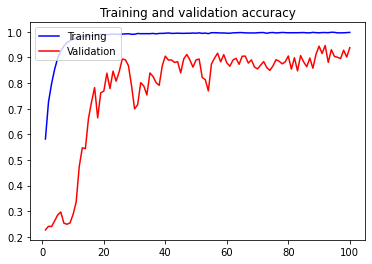

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
legends = ['Training', 'Validation']

plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(legends, loc='upper left')
plt.savefig('C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/mobilenetv2_128acc.jpg')

# plt.plot(epochs, loss, 'g', label = 'Training loss')
# plt.plot(epochs, val_loss, 'y', label='Validation loss')

# plt.savefig('C:/DUAEFATIMA/Loss.jpg')

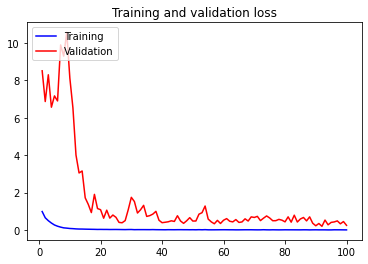

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
legends = ['Training', 'Validation']
epochs = range(1,len(acc)+1)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(legends, loc='upper left')
plt.savefig('C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/mobilenetv2_128Loss.jpg')

In [16]:
true_classes = test_generator.classes
class_labels = list(test_generator.classes)



In [19]:
start = datetime.datetime.now()

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#cm = confusion_matrix(test_generator, y_pred)


39/39 [==============================] - 68s 2s/step
[0 0 0 ... 4 4 4]


In [20]:
# y_pred = model.predict_generator(test_generator.classes)
# # Get most likely class
# predicted_classes = np.argmax(y_pred, axis=1)


In [ ]:
# report = classification_report(true_classes, predicted_classes, target_names=names)
# print(report)

In [21]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

39/39 [==============================] - 68s 2s/step
[[1099    2   11    2    1]
 [ 100  440  410    9    9]
 [  29   41  869   35   25]
 [   9   12  207  645   55]
 [  10    0   60   26  817]]


In [22]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Sensitivity",TPR)
print("Specificity",TNR)
print("Precision or Positive Predictive Values",PPV)
print("Negative predictive values",NPV)
print("False Positive or Fall Out",FPR)
print("False Negative Rate",FNR)
print("False discovery Rate",FDR)
print("Accuracy",ACC)

Sensitivity [0.98565022 0.45454545 0.86986987 0.6950431  0.89485214]
Specificity [0.96113445 0.98609355 0.82466871 0.98197747 0.97755611]
Precision or Positive Predictive Values [0.88131516 0.88888889 0.5581246  0.89958159 0.90077178]
Negative predictive values [0.99564744 0.88075881 0.96137849 0.93271517 0.97609562]
False Positive or Fall Out [0.03886555 0.01390645 0.17533129 0.01802253 0.02244389]
False Negative Rate [0.01434978 0.54545455 0.13013013 0.3049569  0.10514786]
False discovery Rate [0.11868484 0.11111111 0.4418754  0.10041841 0.09922822]
Accuracy [0.96668698 0.88157627 0.83384115 0.9278895  0.96221816]


In [23]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 78.6% 


In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

NameError: name 'y_pred' is not defined

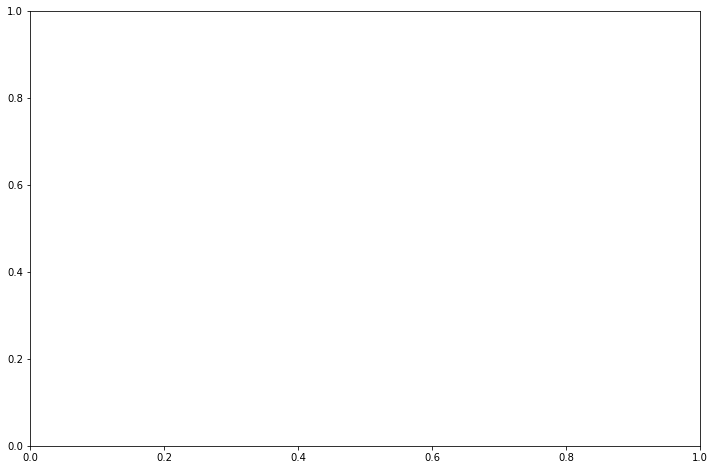

In [23]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

target= ['level_0', 'level_1', 'level_2', 'level_3', 'level_4']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        FPR, TPR, thresholds = roc_curve(y_test[:,idx].astype(int),y_pred)
        c_ax.plot(FPR, label = '%s (AUC:%0.2f)'  % (c_label, auc(FPR, TPR)))
        c_ax.plot(FPR, FPR, 'b-', label = 'Random Guessing'% (c_label, auc(FPR, TPR)))
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_generator.classes, y_pred,average="macro"))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
